In [2]:
%store -r habitat1_gdf habitat2_gdf project_dir

In [3]:
# Import necessary packages
import os
import pathlib
import pandas as pd # Aggregating, data manipulation
import re # Parsing information out of file names
import rioxarray as rxr # Work with raster data
from rioxarray.merge import merge_arrays # Merge rasters
import geopandas as gpd # Work with vector data
import hvplot.pandas
import xrspatial
from math import floor, ceil
import matplotlib.pyplot as plt
import glob
import warnings

/Users/erinzimmerman/miniconda3/envs/earth-analytics-python/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Soil Data 
Soil data was drawn from the POLARIS Database hosted at Duke University. The data repository can be found [here](https://data.fs.usda.gov/geodata/edw/edw_resources/shp/S_USA.NationalGrassland.zip)

## Method
Soil Ph was selected as the first variable and moisture for the second. The mean of each was used as it is most representative of the 'average' found within each area of interest.

Samples from a soil depth of 30-60 cm were selected as that is the center of the root depth of Sorghastrum nutans. In general, this species is robust and found in a diversity of soil types. 

In [4]:
# Define the download URL for the study area (Polaris Data). 
# This data is for the Ph of the soil for Sheyanne National Grassland
soil1_url_template = ("http://hydrology.cee.duke.edu"
            "/POLARIS/PROPERTIES/v1.0"
            "/ph"
            "/mean"
            "/30_60/"
            "lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif"
)

soil1_url = soil1_url_template.format(
        min_lat=46, max_lat=47, min_lon=-96, max_lon=-98)

soil1_url

'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/30_60/lat4647_lon-96-98.tif'

In [5]:
#Define Bounds for Sheyenne National Grassland
habitat1_bounds = bounds_min_lon, bounds_min_lat, bounds_max_lon, bounds_max_lat = (
    habitat1_gdf.total_bounds)

soil1_url_list = []
for min_lon in range(floor(bounds_min_lon), ceil(bounds_max_lon)):
    for min_lat in range(floor(bounds_min_lat), ceil(bounds_max_lat)):
        soil1_url = soil1_url_template.format(
            min_lat=min_lat, max_lat=min_lat+1,
            min_lon=min_lon, max_lon=min_lon+1)
        soil1_url_list.append(soil1_url)
soil1_url_list


['http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/30_60/lat4647_lon-98-97.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/30_60/lat4647_lon-97-96.tif']

In [6]:
soil1_das = []
#loop through each of the soil files
for i in soil1_url_list:
     # Load the raster data into Python, mask and scale and squeeze
    soil1_da = rxr.open_rasterio(
         i,
         mask_and_scale=True
         ).squeeze()
    print('OPENED ')

    # Crop the raster data
    cropped1_da = soil1_da.rio.clip_box(*habitat1_bounds) 
    soil1_das.append(cropped1_da)
    print('CROPPED')


OPENED 
CROPPED
OPENED 
CROPPED


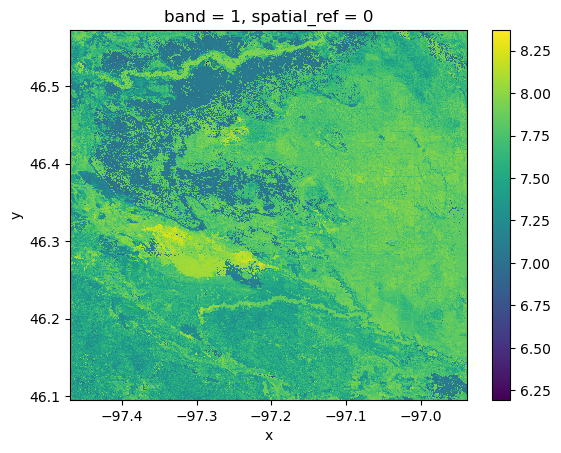

In [7]:
# Merge tiles
soil1_merged_das = merge_arrays(soil1_das)

soil1_merged_das.plot()

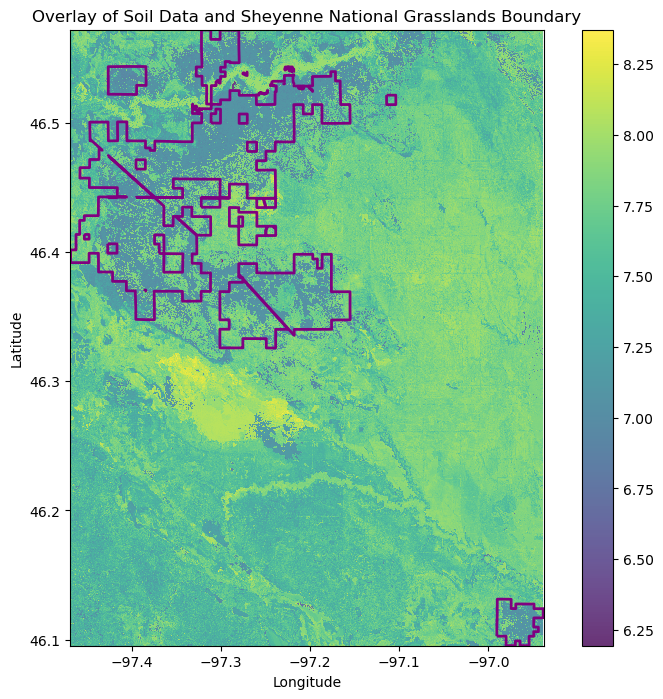

In [8]:
# Create a plot
fig1, ax = plt.subplots(figsize=(10, 8))

# Plot the raster data (soil1_das)
soil1_merged_das.plot(ax=ax, cmap="viridis", alpha=0.8)  # Adjust alpha for transparency

# Plot the boundaries of the vector data (habitat1_gdf)
habitat1_gdf.boundary.plot(ax=ax, color='purple', linewidth=2)

# Add title and labels
ax.set_title("Overlay of Soil Data and Sheyenne National Grasslands Boundary")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()

# Little Missouri National Grassland (Habitat2) - Soil Data Download

In [9]:
# Define the download URL for the study area (Polaris Data). 
# This data is for the Ph of the soil (This is for the second study area of Little Missouri National Grassland)
soil2_url_template = ("http://hydrology.cee.duke.edu"
            "/POLARIS/PROPERTIES/v1.0"
            "/ph"
            "/mean"
            "/30_60/"
            "lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif"
)

soil2_url = soil2_url_template.format(
        min_lat=49, max_lat=49, min_lon=-102, max_lon=-105)
soil2_url

'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/30_60/lat4949_lon-102-105.tif'

In [10]:
# Define bounds for Missouri Grasslands 
habitat2_bounds = bounds_min_lon, bounds_min_lat, bounds_max_lon, bounds_max_lat = (
    habitat2_gdf.total_bounds)

soil2_url_list = []
for min_lon in range(floor(bounds_min_lon), ceil(bounds_max_lon)):
    for min_lat in range(floor(bounds_min_lat), ceil(bounds_max_lat)):
        soil2_url = soil2_url_template.format(
            min_lat=min_lat, max_lat=min_lat+1,
            min_lon=min_lon, max_lon=min_lon+1)
        soil2_url_list.append(soil2_url)
soil2_url_list

soil2_das = []
#loop through each of the soil files
for i in soil2_url_list:
  
     # Load the raster data into Python, mask and scale and squeeze
     soil2_da = rxr.open_rasterio(
         i,
         mask_and_scale=True
         ).squeeze()
     print('OPENED ')

     #Crop the raster data
     cropped2_da = soil2_da.rio.clip_box(*habitat2_bounds) 
     soil2_das.append(cropped2_da)
     print('CROPPED')

display(soil2_das)


OPENED 
CROPPED
OPENED 
CROPPED
OPENED 
CROPPED
OPENED 
CROPPED
OPENED 
CROPPED
OPENED 
CROPPED
OPENED 
CROPPED
OPENED 
CROPPED
OPENED 
CROPPED


[<xarray.DataArray (y: 2592, x: 165)> Size: 2MB
 [427680 values with dtype=float32]
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 1kB -104.0 -104.0 -104.0 ... -104.0 -104.0 -104.0
   * y            (y) float64 21kB 47.0 47.0 47.0 47.0 ... 46.28 46.28 46.28
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:  Area,
 <xarray.DataArray (y: 3600, x: 165)> Size: 2MB
 [594000 values with dtype=float32]
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 1kB -104.0 -104.0 -104.0 ... -104.0 -104.0 -104.0
   * y            (y) float64 29kB 48.0 48.0 48.0 48.0 ... 47.0 47.0 47.0 47.0
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:  Area,
 <xarray.DataArray (y: 451, x: 165)> Size: 298kB
 [74415 values with dtype=float32]
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 1kB -104.0 -104.0 -104.0 ... -104.0 -104.0 -104.0
   * y            (y) float64 4kB 48.13 48.12 48.12 48.12 ... 48.0 48.0 48.0 48.0
   

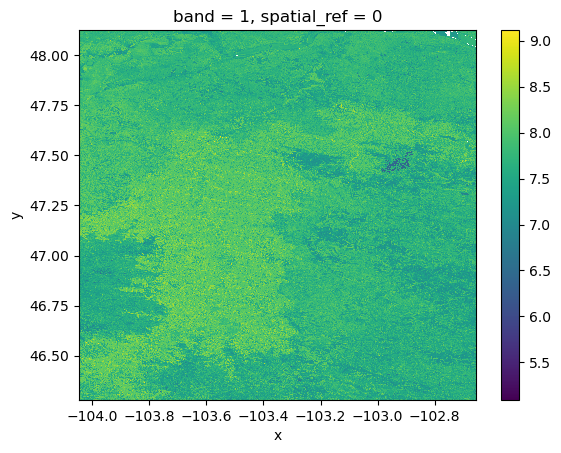

In [11]:
# Merge tiles
soil2_merged_das = merge_arrays(soil2_das)
soil2_merged_das.plot()

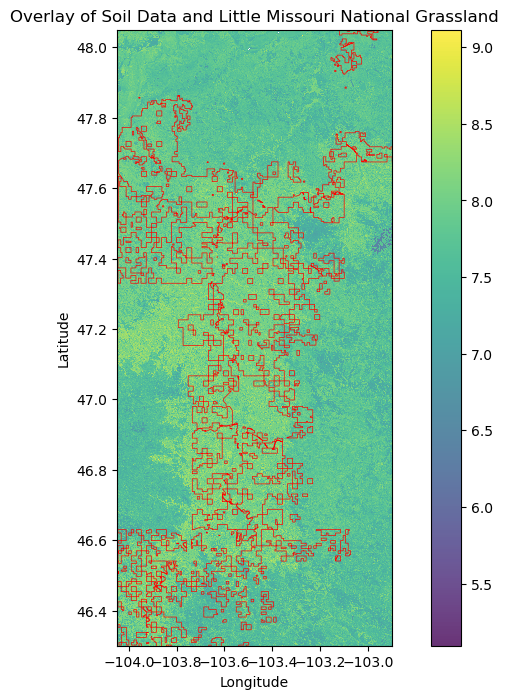

In [12]:
# Create a plot
fig2, ax = plt.subplots(figsize=(10, 8))

# Plot the raster data (soil1_da)
soil2_merged_das.plot(ax=ax, cmap="viridis", alpha=0.8)  # Adjust alpha for transparency

# Plot the boundaries of the vector data (habitat1_gdf)
habitat2_gdf.boundary.plot(ax=ax, color='red', linewidth=.5)

# Add title and labels
ax.set_title("Overlay of Soil Data and Little Missouri National Grassland")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Adjust boundaries of data
xmin, xmax = -104.05, -102.9  
ymin, ymax = 46.3, 48.05    
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Show the plot
plt.show()

In [13]:
%store habitat1_gdf habitat2_gdf soil1_merged_das soil2_merged_das

Stored 'habitat1_gdf' (GeoDataFrame)
Stored 'habitat2_gdf' (GeoDataFrame)
Stored 'soil1_merged_das' (DataArray)
Stored 'soil2_merged_das' (DataArray)
